In [1]:
import os
os.chdir('/root/awid_dataset/')
import pandas as pd
import numpy as np
import csv
import os
import time
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

# Read in the CSV files
dataset_columns = ['frame.interface_id',	'frame.dlt',	'frame.offset_shift',	'frame.time_epoch',	'frame.time_delta',	'frame.time_delta_displayed',	'frame.time_relative',	'frame.len',	'frame.cap_len',	'frame.marked',	'frame.ignored',	'radiotap.version',	'radiotap.pad',	'radiotap.length',	'radiotap.present.tsft',	'radiotap.present.flags',	'radiotap.present.rate',	'radiotap.present.channel',	'radiotap.present.fhss',	'radiotap.present.dbm_antsignal',	'radiotap.present.dbm_antnoise',	'radiotap.present.lock_quality',	'radiotap.present.tx_attenuation',	'radiotap.present.db_tx_attenuation',	'radiotap.present.dbm_tx_power',	'radiotap.present.antenna',	'radiotap.present.db_antsignal',	'radiotap.present.db_antnoise',	'radiotap.present.rxflags',	'radiotap.present.xchannel',	'radiotap.present.mcs',	'radiotap.present.ampdu',	'radiotap.present.vht',	'radiotap.present.reserved',	'radiotap.present.rtap_ns',	'radiotap.present.vendor_ns',	'radiotap.present.ext',	'radiotap.mactime',	'radiotap.flags.cfp',	'radiotap.flags.preamble',	'radiotap.flags.wep',	'radiotap.flags.frag',	'radiotap.flags.fcs',	'radiotap.flags.datapad',	'radiotap.flags.badfcs',	'radiotap.flags.shortgi',	'radiotap.datarate',	'radiotap.channel.freq',	'radiotap.channel.type.turbo',	'radiotap.channel.type.cck',	'radiotap.channel.type.ofdm',	'radiotap.channel.type.2ghz',	'radiotap.channel.type.5ghz',	'radiotap.channel.type.passive',	'radiotap.channel.type.dynamic',	'radiotap.channel.type.gfsk',	'radiotap.channel.type.gsm',	'radiotap.channel.type.sturbo',	'radiotap.channel.type.half',	'radiotap.channel.type.quarter',	'radiotap.dbm_antsignal',	'radiotap.antenna',	'radiotap.rxflags.badplcp',	'wlan.fc.type_subtype',	'wlan.fc.version',	'wlan.fc.type',	'wlan.fc.subtype',	'wlan.fc.ds',	'wlan.fc.frag',	'wlan.fc.retry',	'wlan.fc.pwrmgt',	'wlan.fc.moredata',	'wlan.fc.protected',	'wlan.fc.order',	'wlan.duration',	'wlan.ra',	'wlan.da',	'wlan.ta',	'wlan.sa',	'wlan.bssid',	'wlan.frag',	'wlan.seq',	'wlan.bar.type',	'wlan.ba.control.ackpolicy',	'wlan.ba.control.multitid',	'wlan.ba.control.cbitmap',	'wlan.bar.compressed.tidinfo',	'wlan.ba.bm',	'wlan.fcs_good',	'wlan_mgt.fixed.capabilities.ess',	'wlan_mgt.fixed.capabilities.ibss',	'wlan_mgt.fixed.capabilities.cfpoll.ap',	'wlan_mgt.fixed.capabilities.privacy',	'wlan_mgt.fixed.capabilities.preamble',	'wlan_mgt.fixed.capabilities.pbcc',	'wlan_mgt.fixed.capabilities.agility',	'wlan_mgt.fixed.capabilities.spec_man',	'wlan_mgt.fixed.capabilities.short_slot_time',	'wlan_mgt.fixed.capabilities.apsd',	'wlan_mgt.fixed.capabilities.radio_measurement',	'wlan_mgt.fixed.capabilities.dsss_ofdm',	'wlan_mgt.fixed.capabilities.del_blk_ack',	'wlan_mgt.fixed.capabilities.imm_blk_ack',	'wlan_mgt.fixed.listen_ival',	'wlan_mgt.fixed.current_ap',	'wlan_mgt.fixed.status_code',	'wlan_mgt.fixed.timestamp',	'wlan_mgt.fixed.beacon',	'wlan_mgt.fixed.aid',	'wlan_mgt.fixed.reason_code',	'wlan_mgt.fixed.auth.alg',	'wlan_mgt.fixed.auth_seq',	'wlan_mgt.fixed.category_code',	'wlan_mgt.fixed.htact',	'wlan_mgt.fixed.chanwidth',	'wlan_mgt.fixed.fragment',	'wlan_mgt.fixed.sequence',	'wlan_mgt.tagged.all',	'wlan_mgt.ssid',	'wlan_mgt.ds.current_channel',	'wlan_mgt.tim.dtim_count',	'wlan_mgt.tim.dtim_period',	'wlan_mgt.tim.bmapctl.multicast',	'wlan_mgt.tim.bmapctl.offset',	'wlan_mgt.country_info.environment',	'wlan_mgt.rsn.version',	'wlan_mgt.rsn.gcs.type',	'wlan_mgt.rsn.pcs.count',	'wlan_mgt.rsn.akms.count',	'wlan_mgt.rsn.akms.type',	'wlan_mgt.rsn.capabilities.preauth',	'wlan_mgt.rsn.capabilities.no_pairwise',	'wlan_mgt.rsn.capabilities.ptksa_replay_counter',	'wlan_mgt.rsn.capabilities.gtksa_replay_counter',	'wlan_mgt.rsn.capabilities.mfpr',	'wlan_mgt.rsn.capabilities.mfpc',	'wlan_mgt.rsn.capabilities.peerkey',	'wlan_mgt.tcprep.trsmt_pow',	'wlan_mgt.tcprep.link_mrg',	'wlan.wep.iv',	'wlan.wep.key',	'wlan.wep.icv',	'wlan.tkip.extiv',	'wlan.ccmp.extiv',	'wlan.qos.tid',	'wlan.qos.priority',	'wlan.qos.eosp',	'wlan.qos.ack',	'wlan.qos.amsdupresent',	'wlan.qos.buf_state_indicated',	'wlan.qos.bit4',	'wlan.qos.txop_dur_req',	'wlan.qos.buf_state_indicated',	'data.len',	'class']

print("Reading training csv file.")
df1 = pd.read_csv('awid_train_set')
df1.columns = dataset_columns
df1=df1.replace('?',0)

df1.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True) 

print("Reading testing csv file.")
df2 = pd.read_csv('awid_test_set')
df2.columns = dataset_columns
df2=df2.replace('?',0)

df2.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True)  

Reading training csv file.


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading testing csv file.


In [2]:
print(set(df2['class'].unique()) - set(df1['class'].unique()), set(df1['class'].unique()) - set(df2['class'].unique()))

{'probe_response', 'authentication_request'} {'probe_request', 'power_saving', 'rts', 'hirte', 'chop_chop', 'cts', 'disassociation'}


In [3]:
df = pd.concat([df1, df2])
print(len(df),len(df1),len(df2),len(df1)+len(df2))

2371216 575642 1795574 2371216


In [4]:
#max([float(i) for i in df1[dataset_columns[37]]])
#[dataset_columns[i] for i in [71, 72, 73, 74, 86, 98, 99, 100, 101, 103, 104]]
#dataset_columns.index(df1.columns[79])
print (len(df['class'].unique()),df['class'].unique())
os.chdir('/root/pathint/fig_split_mnist/')
print(os.getcwd())

17 ['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts'
 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte'
 'power_saving' 'disassociation' 'authentication_request' 'probe_response']
/root/pathint/fig_split_mnist


In [5]:
obj_df = df; 
Y_all_attacks = obj_df["class"]
#obj_df=pd.get_dummies(obj_df, columns=["class"])


X = obj_df.values[:,:-1]  #It has 17 labels 
print (X.shape)
print("Datasetset Formatting")
for j in range(0,123):
    maximum = max([float(k) for k in X[:,j]]) if  max([float(k) for k in X[:,j]]) != 0 else 1
    print(j)
    for i in range(0,len(X)):
        X[i,j] = round(float(X[i,j])/maximum,3)

(2371216, 123)
Datasetset Formatting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


In [6]:
print (X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_all_attacks, Y_test_all_attacks = train_test_split(X, Y_all_attacks, test_size=0.7)
print (X_train.shape)

#['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts' 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte' 'power_saving' 'disassociation' 'authentication_request' 'probe_response']
cleanup_nums = {"normal":0, "fragmentation":1, "arp":2, "probe_request":3, "chop_chop":4, "rts":5, "deauthentication":6, "amok":7, "beacon":8, "evil_twin":9, "cafe_latte":10, "cts":11, "hirte":12, "power_saving":13, "disassociation":14, "authentication_request":15, "probe_response":16}
Y_train_all_attacks.replace(cleanup_nums,inplace=True)
Y_test_all_attacks.replace(cleanup_nums,inplace=True)

(2371216, 123)
(711364, 123)


In [7]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf
slim = tf.contrib.slim
graph_replace = tf.contrib.graph_editor.graph_replace

import sys, os
sys.path.extend([os.path.expanduser('..')])
from pathint import utils
import seaborn as sns
sns.set_style("ticks")

from tqdm import trange, tqdm

# import operator
import matplotlib.colors as colors
import matplotlib.cm as cmx

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

select = tf.select if hasattr(tf, 'select') else tf.where

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'maximum']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
# Data params
input_dim = 123
output_dim = 17

# Network params
n_hidden_units = 123
activation_fn = tf.nn.relu

# Optimization params
batch_size = 64
epochs_per_task = 10

n_stats = 1

# Reset optimizer after each age
reset_optimizer = True

In [9]:
from keras.utils import np_utils

#task_labels = [[8,1],[5,3],[4,9], [11,7], [6,2], [0,10], [14,2],[12,13]]
#task_labels = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,0]]
task_labels = [[0,1,2], [3,4,5], [6,7,8], [9,10,11], [12,13,14], [15,16]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8,9]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

for labels in task_labels:
    idx = np.in1d(Y_test_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_test[idx], np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
    else:
        data = X_test[idx], np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        validation_datasets.append(data)

In [10]:
tf.reset_default_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)
sess.run(tf.global_variables_initializer())
import keras.backend as K
import keras.activations as activations

output_mask = tf.Variable(tf.zeros(output_dim), name="mask", trainable=False)

def masked_softmax(logits):
    # logits are [batch_size, output_dim]
    x = select(tf.tile(tf.equal(output_mask[None, :], 1.0), [tf.shape(logits)[0], 1]), logits, -1e32 * tf.ones_like(logits))
    return activations.softmax(x)

def set_active_outputs(labels):
    new_mask = np.zeros(output_dim)
    for l in labels:
        new_mask[l] = 1.0
    sess.run(output_mask.assign(new_mask))
    sess.run(output_mask)
    
def masked_predict(model, data, targets):
    pred = model.predict(data)
    #print(pred)
    acc = np.argmax(pred,1)==np.argmax(targets,1)
    return acc.mean()

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(n_hidden_units, kernel_initializer='random_uniform', activation=activation_fn, input_shape=(input_dim,)))
#model.add(Dropout(0.2))
model.add(Dense(62, kernel_initializer='random_uniform', activation=activation_fn))
#model.add(Dropout(0.2))
#model.add(Dense(n_hidden_units, activation=activation_fn))
model.add(Dense(output_dim, kernel_initializer='random_uniform', activation=masked_softmax))

from pathint import protocols
from pathint.optimizers import KOOptimizer
from keras.optimizers import Adam, RMSprop,SGD
from keras.callbacks import Callback
from pathint.keras_utils import LossHistory
from keras.callbacks import History 
from keras.callbacks import LambdaCallback

#protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
#protocol_name, protocol = protocols.FISHER_PROTOCOL('sum')
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)
#opt = SGD(1e-3)
#opt = RMSprop(lr=1e-3)
oopt = KOOptimizer(opt, model=model, **protocol)
model.compile(loss='categorical_crossentropy', optimizer=oopt, metrics=['accuracy'])
model.model._make_train_function()
saved_weights = model.get_weights()

save_weights_epoch=[]
save_loss_epoch=[]
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_weights_epoch.append(model.get_weights()))
history = LossHistory()
#history = History()
callbacks = [history]
datafile_name = "split_mnist_data_%s.pkl.gz"%protocol_name

In [12]:
print(protocol)

{'step_updates': [('grads2', <function <lambda>.<locals>.<lambda> at 0x7fb845ef7c80>)], 'regularizer_fn': <function quadratic_regularizer at 0x7fb845ef78c8>, 'init_updates': [('cweights', <function <lambda>.<locals>.<lambda> at 0x7fb845ef7510>)], 'task_updates': [('omega', <function <lambda>.<locals>.<lambda> at 0x7fb81c7176a8>), ('cweights', <function <lambda>.<locals>.<lambda> at 0x7fb81c717730>), ('grads2', <function <lambda>.<locals>.<lambda> at 0x7fb81c7177b8>)]}


In [13]:
def model_prune(task_number, unimportant_threshold):
    All_weights = model.get_weights()
    imp_par = {}
    
    lossdiff = save_loss_epoch[task_number][-2]-save_loss_epoch[task_number][-1]
    
    w1_old=save_weights_epoch[10*(task_number-1)+9][0]
    w1_new=save_weights_epoch[10*task_number+9][0]
    b1_old=save_weights_epoch[10*(task_number-1)+9][1]
    b1_new=save_weights_epoch[10*task_number+9][1]
    w2_old=save_weights_epoch[10*(task_number-1)+9][2]
    w2_new=save_weights_epoch[10*task_number+9][2]
    b2_old=save_weights_epoch[10*(task_number-1)+9][3]
    b2_new=save_weights_epoch[10*task_number+9][3]

    dw1 = np.true_divide(lossdiff,(np.array(w1_old) - np.array(w1_new))**2 + 1e-6)
    db1 = np.true_divide(lossdiff,(np.array(b1_old) - np.array(b1_new))**2 + 1e-6)
    dw2 = np.true_divide(lossdiff,(np.array(w2_old) - np.array(w2_new))**2 + 1e-6)
    db2 = np.true_divide(lossdiff,(np.array(b2_old) - np.array(b2_new))**2 + 1e-6)
    unimportant_threshold = np.mean(dw1)-3*np.std(dw1)
    unimportant_nodes_dw1 = np.where(dw1 < unimportant_threshold)
    unimportant_threshold = np.mean(db1)-3*np.std(db1)
    unimportant_nodes_db1 = np.where(db1 < unimportant_threshold)
    unimportant_threshold = np.mean(dw2)-3*np.std(dw2)
    unimportant_nodes_dw2 = np.where(dw2 < unimportant_threshold)
    unimportant_threshold = np.mean(db2)-3*np.std(db2)
    unimportant_nodes_db2 = np.where(db2 < unimportant_threshold)
    cusion_fraction = 0.8
    #if len(unimportant_nodes_dw1[0]) > cusion_fraction*len(unimportant_nodes_dw2[0]) and len(unimportant_nodes_dw1[0]) < cusion_fraction*(len(dw1)**2) and len(unimportant_nodes_dw2[0]) < cusion_fraction*(len(dw2)**2): 

    print('# of unimportant weights {0} in 1st layer out of {1} weights'.format(len(unimportant_nodes_dw1[0]),len(dw1)*len(dw1)))
    print('# of unimportant biases {0} in 1st layer out of {1} biases'.format(len(unimportant_nodes_db1[0]),len(db1)))
    print('# of unimportant weights {0} in 2nd layer out of {1} weights'.format(len(unimportant_nodes_dw2[0]),len(dw2)*len(dw2)))
    print('# of unimportant biases {0} in 2nd layer out of {1} biases'.format(len(unimportant_nodes_db2[0]),len(db2)))

    for i,j in zip(unimportant_nodes_dw1[0],unimportant_nodes_dw1[1]):
        All_weights[0][i][j] = 0

    for i in zip(unimportant_nodes_db1[0]):
        All_weights[1][i] = 0

    for i,j in zip(unimportant_nodes_dw2[0],unimportant_nodes_dw2[1]):
        All_weights[2][i][j] = 0

    for i in zip(unimportant_nodes_db2[0]):
        All_weights[3][i] = 0

    model.set_weights(All_weights)
    imp_par['iw1'] = dw1; imp_par['ib1'] = db1; imp_par['iw2'] = dw2; imp_par['ib2'] = db2
    return imp_par

In [14]:
def run_fits(cvals, training_data, valid_data, eval_on_train_set=False, nstats=1):
    acc_mean = dict()
    acc_std = dict()
    model_weights_save = []   #Empty list to save the model weights aftertraining each task
    imp_par = dict()  #Empty list to save importance parameter after learning each progressive task
    for cidx, cval_ in enumerate(tqdm(cvals)):
        runs = []
        for runid in range(nstats):
            sess.run(tf.global_variables_initializer())
            # model.set_weights(saved_weights)
            cstuffs = []
            evals = []
            print("setting cval")
            cval = cval_
            oopt.set_strength(cval)
            oopt.init_task_vars()
            print("cval is", sess.run(oopt.lam))
            for age, tidx in enumerate(range(n_tasks)):
                print("Age %i, cval is=%f"%(age,cval))
                print("settint output mask")
                set_active_outputs(task_labels[age])
                stuffs = model.fit(training_data[tidx][0], training_data[tidx][1], batch_size, epochs_per_task, callbacks=[print_weights])
                save_loss_epoch.append(stuffs.history['loss'])
                if age != 0:
                    imp_par[age] = model_prune(age, unimportant_threshold = n_tasks-age)
                oopt.update_task_metrics(training_data[tidx][0], training_data[tidx][1], batch_size)
                oopt.update_task_vars()
                ftask = []
                model_weights_save.append(model.get_weights()) #Save the model weights aftertraining each task
                for j in range(n_tasks):
                    set_active_outputs(task_labels[j])
                    if eval_on_train_set:
                        f_ = masked_predict(model, training_data[j][0], training_data[j][1])
                    else:
                        f_ = masked_predict(model, valid_data[j][0], valid_data[j][1])
                    ftask.append(np.mean(f_))
                evals.append(ftask)
                cstuffs.append(stuffs)

                # Re-initialize optimizater variables
                if reset_optimizer:
                    oopt.reset_optimizer()

            evals = np.array(evals)
            runs.append(evals)
        
        runs = np.array(runs)
        acc_mean[cval_] = runs.mean(0)
        acc_std[cval_] = runs.std(0)
    return dict(mean=acc_mean, std=acc_std),model_weights_save, imp_par

In [15]:
# cvals = np.concatenate(([0], np.logspace(-2, 2, 10)))
# cvals = np.concatenate(([0], np.logspace(-1, 2, 2)))
# cvals = np.concatenate(([0], np.logspace(-2, 0, 3)))
#cvals = np.logspace(-3, 3, 7)#[0, 1.0, 2, 5, 10]
cvals = [1.0]
print(cvals)

[1.0]


In [16]:
#%%capture
np.random.seed(0)
recompute_data = True

if recompute_data:
    data,model_weights_save,imp_par = run_fits(cvals, training_datasets, validation_datasets, eval_on_train_set=False, nstats=n_stats)
    utils.save_zipped_pickle(data, datafile_name)

  0%|          | 0/1 [00:00<?, ?it/s]

setting cval
cval is 1.0
Age 0, cval is=1.000000
settint output mask
Epoch 1/10
672831/672831 [==============================] - 33s - loss: 0.0245 - acc: 0.9908    
Epoch 2/10
672831/672831 [==============================] - 33s - loss: 0.0065 - acc: 0.9980    
Epoch 3/10
672831/672831 [==============================] - 33s - loss: 0.0053 - acc: 0.9984    
Epoch 4/10
672831/672831 [==============================] - 33s - loss: 0.0052 - acc: 0.9985    
Epoch 5/10
672831/672831 [==============================] - 33s - loss: 0.0042 - acc: 0.9988    
Epoch 6/10
672831/672831 [==============================] - 33s - loss: 0.0065 - acc: 0.9981    
Epoch 7/10
672831/672831 [==============================] - 33s - loss: 0.0033 - acc: 0.9990    
Epoch 8/10
672831/672831 [==============================] - 33s - loss: 0.0032 - acc: 0.9990    
Epoch 9/10
672831/672831 [==============================] - 33s - loss: 0.0071 - acc: 0.9971    
Epoch 10/10
672831/672831 [==============================]

100%|██████████| 1/1 [11:14<00:00, 674.95s/it]


In [17]:
#stats for the importance parameter
for i in imp_par.keys():
    print(len(np.where(imp_par[i]['iw1'] < np.mean(imp_par[i]['iw1']) - 3*np.std(imp_par[i]['iw1']))[0]), len(np.where(imp_par[i]['ib1'] < np.mean(imp_par[i]['ib1']) - 3*np.std(imp_par[i]['ib1']))[0]), len(np.where(imp_par[i]['iw2'] < np.mean(imp_par[i]['iw2']) - 3*np.std(imp_par[i]['iw2']))[0]), len(np.where(imp_par[i]['ib2'] < np.mean(imp_par[i]['ib2'])- 3*np.std(imp_par[i]['ib2']))[0]))

168 1 442 0
297 4 547 2
475 5 427 0
360 2 326 4
590 5 317 5


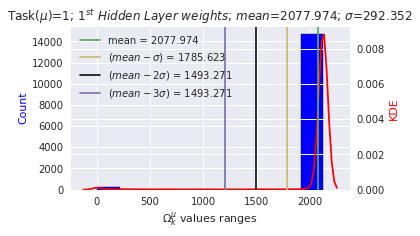

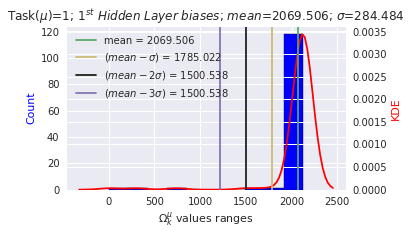

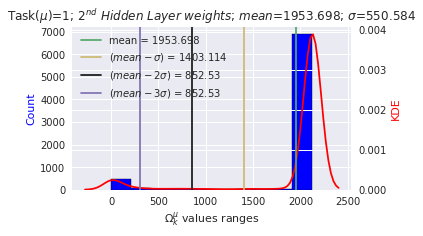

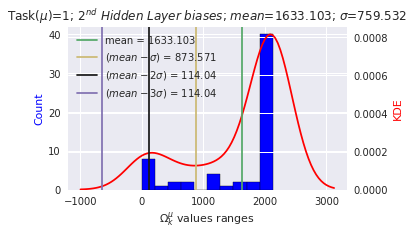

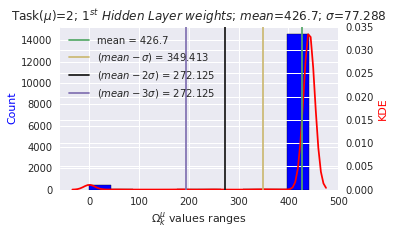

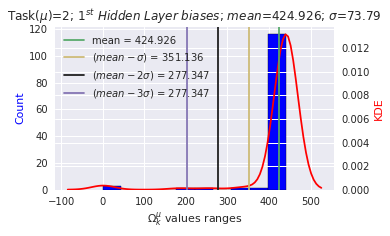

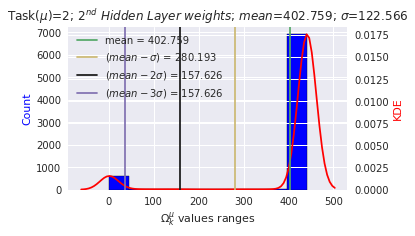

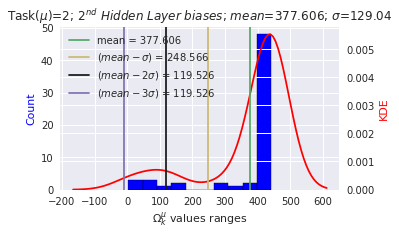

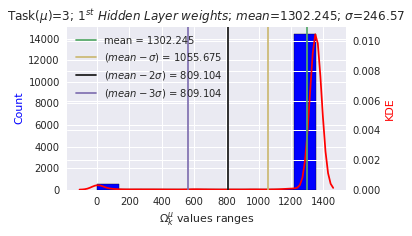

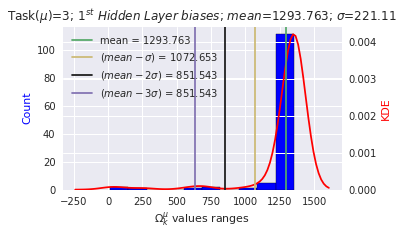

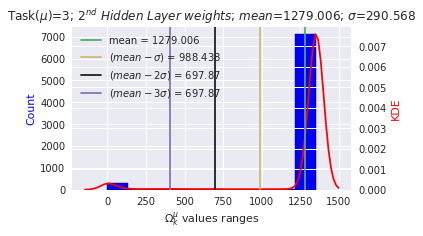

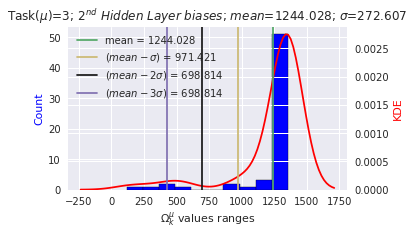

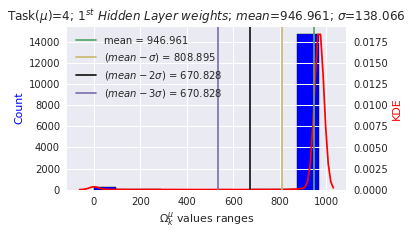

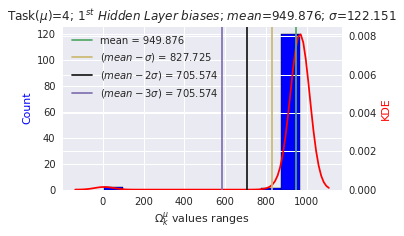

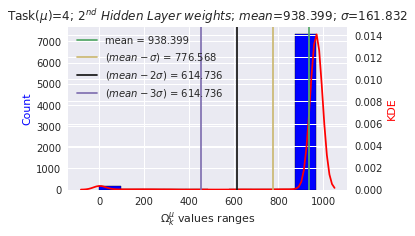

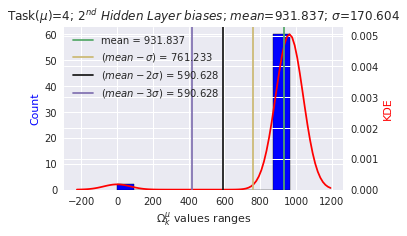

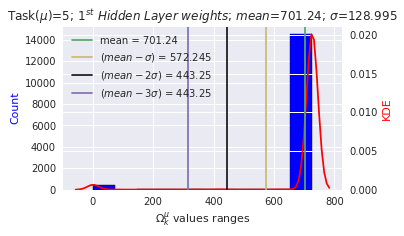

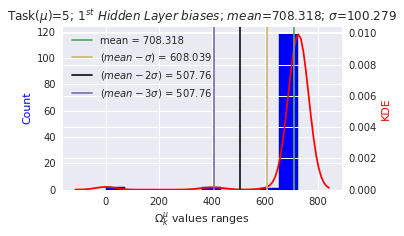

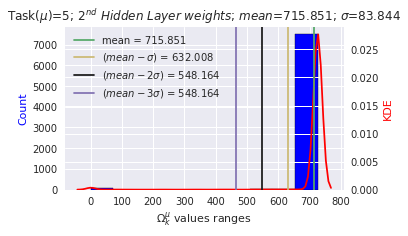

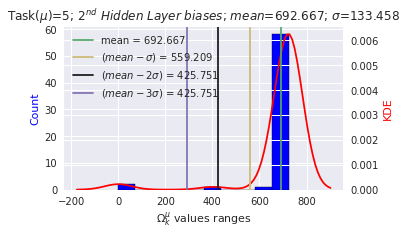

In [19]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
#%matplotlib inline
from matplotlib import pyplot
import itertools
import pdb
import seaborn as sns
sns.set(color_codes=True)

for i in imp_par.keys():
    flatweights = list(itertools.chain.from_iterable(imp_par[i]['iw1'].tolist()))
    pyplot.figure(figsize=(5,3))
    pyplot.hist(flatweights, color = 'blue', edgecolor = 'black', bins=10)
    ax = sns.distplot(flatweights, bins=10, kde=False, color='blue', hist_kws={'edgecolor':'black'})
    ax.set_ylabel('Count')
    ax.set_xlabel('$\Omega^{\mu}_{k}$ values ranges')
    ax.yaxis.label.set_color('blue')
    second_ax = ax.twinx()
    sns.distplot(flatweights, ax=second_ax, kde=True, hist=False, color='red')
    second_ax.set_ylabel('KDE')
    second_ax.yaxis.label.set_color('red')
    pyplot.title('Task($\mu$)='+str(i)+'; $1^{st} \, \, Hidden \, \, Layer \, \, weights$;'+' $mean$='+str(round(np.mean(flatweights),3))+'; $\sigma$='+str(round(np.std(flatweights),3)))
    pyplot.axvline(x=round(np.mean(flatweights),3), label='mean = {}'.format(round(np.mean(flatweights),3)), c='g')
    pyplot.axvline(x=round(np.mean(flatweights),3) - round(np.std(flatweights),3), label='$(mean - \sigma)$ = {}'.format(round(np.mean(flatweights) - np.std(flatweights),3)), c='y')
    pyplot.axvline(x=round(np.mean(flatweights),3) - 2*round(np.std(flatweights),3), label='$(mean - 2\sigma)$ = {}'.format(round(np.mean(flatweights) - 2 * np.std(flatweights),3)), c='k')
    pyplot.axvline(x=round(np.mean(flatweights),3) - 3*round(np.std(flatweights),3), label='$(mean - 3\sigma)$ = {}'.format(round(np.mean(flatweights) - 2 * np.std(flatweights),3)), c='m')
    pyplot.legend()
    pyplot.savefig('ImportanceValue_w1_awid'+str(i)+'.pdf',bbox_inches='tight')
    pylab.show()
    
    flatweights = imp_par[i]['ib1'].tolist()
    pyplot.figure(figsize=(5,3))
    pyplot.hist(flatweights, color = 'blue', edgecolor = 'black', bins=10)
    ax = sns.distplot(flatweights, bins=10, kde=False, color='blue', hist_kws={'edgecolor':'black'})
    ax.set_ylabel('Count')
    ax.set_xlabel('$\Omega^{\mu}_{k}$ values ranges')
    ax.yaxis.label.set_color('blue')
    second_ax = ax.twinx()
    sns.distplot(flatweights, ax=second_ax, kde=True, hist=False, color='red')
    second_ax.set_ylabel('KDE')
    second_ax.yaxis.label.set_color('red')
    pyplot.title('Task($\mu$)='+str(i)+'; $1^{st} \, \, Hidden \, \, Layer \, \, biases$;'+' $mean$='+str(round(np.mean(flatweights),3))+'; $\sigma$='+str(round(np.std(flatweights),3)))
    pyplot.axvline(x=round(np.mean(flatweights),3), label='mean = {}'.format(round(np.mean(flatweights),3)), c='g')
    pyplot.axvline(x=round(np.mean(flatweights),3) - round(np.std(flatweights),3), label='$(mean - \sigma)$ = {}'.format(round(np.mean(flatweights) - np.std(flatweights),3)), c='y')
    pyplot.axvline(x=round(np.mean(flatweights),3) - 2*round(np.std(flatweights),3), label='$(mean - 2\sigma)$ = {}'.format(round(np.mean(flatweights) - 2 * np.std(flatweights),3)), c='k')
    pyplot.axvline(x=round(np.mean(flatweights),3) - 3*round(np.std(flatweights),3), label='$(mean - 3\sigma)$ = {}'.format(round(np.mean(flatweights) - 2 * np.std(flatweights),3)), c='m')
    pyplot.legend()
    pyplot.savefig('ImportanceValue_b1_awid'+str(i)+'.pdf',bbox_inches='tight')
    pylab.show()
    
    flatweights = list(itertools.chain.from_iterable(imp_par[i]['iw2'].tolist()))
    pyplot.figure(figsize=(5,3))
    pyplot.hist(flatweights, color = 'blue', edgecolor = 'black', bins=10)
    ax = sns.distplot(flatweights, bins=10, kde=False, color='blue', hist_kws={'edgecolor':'black'})
    ax.set_ylabel('Count')
    ax.set_xlabel('$\Omega^{\mu}_{k}$ values ranges')
    ax.yaxis.label.set_color('blue')
    second_ax = ax.twinx()
    sns.distplot(flatweights, ax=second_ax, kde=True, hist=False, color='red')
    second_ax.set_ylabel('KDE')
    second_ax.yaxis.label.set_color('red')
    pyplot.title('Task($\mu$)='+str(i)+'; $2^{nd} \, \, Hidden \, \, Layer \, \, weights$;'+' $mean$='+str(round(np.mean(flatweights),3))+'; $\sigma$='+str(round(np.std(flatweights),3)))
    pyplot.axvline(x=round(np.mean(flatweights),3), label='mean = {}'.format(round(np.mean(flatweights),3)), c='g')
    pyplot.axvline(x=round(np.mean(flatweights),3) - round(np.std(flatweights),3), label='$(mean - \sigma)$ = {}'.format(round(np.mean(flatweights) - np.std(flatweights),3)), c='y')
    pyplot.axvline(x=round(np.mean(flatweights),3) - 2*round(np.std(flatweights),3), label='$(mean - 2\sigma)$ = {}'.format(round(np.mean(flatweights) - 2 * np.std(flatweights),3)), c='k')
    pyplot.axvline(x=round(np.mean(flatweights),3) - 3*round(np.std(flatweights),3), label='$(mean - 3\sigma)$ = {}'.format(round(np.mean(flatweights) - 2 * np.std(flatweights),3)), c='m')
    pyplot.legend()
    pyplot.savefig('ImportanceValue_w2_awid'+str(i)+'.pdf',bbox_inches='tight')
    pylab.show()
    
    flatweights = imp_par[i]['ib2'].tolist()
    pyplot.figure(figsize=(5,3))
    pyplot.hist(flatweights, color = 'blue', edgecolor = 'black', bins=10)
    ax = sns.distplot(flatweights, bins=10, kde=False, color='blue', hist_kws={'edgecolor':'black'})
    ax.set_ylabel('Count')
    ax.set_xlabel('$\Omega^{\mu}_{k}$ values ranges')
    ax.yaxis.label.set_color('blue')
    second_ax = ax.twinx()
    sns.distplot(flatweights, ax=second_ax, kde=True, hist=False, color='red')
    second_ax.set_ylabel('KDE')
    second_ax.yaxis.label.set_color('red')
    pyplot.title('Task($\mu$)='+str(i)+'; $2^{nd} \, \, Hidden \, \, Layer \, \, biases$;'+' $mean$='+str(round(np.mean(flatweights),3))+'; $\sigma$='+str(round(np.std(flatweights),3)))
    pyplot.axvline(x=round(np.mean(flatweights),3), label='mean = {}'.format(round(np.mean(flatweights),3)), c='g')
    pyplot.axvline(x=round(np.mean(flatweights),3) - round(np.std(flatweights),3), label='$(mean - \sigma)$ = {}'.format(round(np.mean(flatweights) - np.std(flatweights),3)), c='y')
    pyplot.axvline(x=round(np.mean(flatweights),3) - 2*round(np.std(flatweights),3), label='$(mean - 2\sigma)$ = {}'.format(round(np.mean(flatweights) - 2 * np.std(flatweights),3)), c='k')
    pyplot.axvline(x=round(np.mean(flatweights),3) - 3*round(np.std(flatweights),3), label='$(mean - 3\sigma)$ = {}'.format(round(np.mean(flatweights) - 2 * np.std(flatweights),3)), c='m')
    pyplot.legend()
    pyplot.savefig('ImportanceValue_b2_awid'+str(i)+'.pdf',bbox_inches='tight')
    pylab.show()
    

In [18]:
import h5py
print(model.summary())
model.save_weights('saved_weights.h5') #This file cannot be opend normaly to view the weghts. It can be loaded through load_model() or can be opend via hdf5 viewer

#Shape of the array containg model weights
a_list = model.get_weights()
for i in range(len(a_list)):
    print((np.array(a_list[i])).shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 123)               15252     
_________________________________________________________________
dense_2 (Dense)              (None, 62)                7688      
_________________________________________________________________
dense_3 (Dense)              (None, 17)                1071      
Total params: 24,011
Trainable params: 24,011
Non-trainable params: 0
_________________________________________________________________
None
(123, 123)
(123,)
(123, 62)
(62,)
(62, 17)
(17,)


In [ ]:
data = utils.load_zipped_pickle(datafile_name)

In [29]:
for k in cvals:
    for i in range(n_tasks):
        for j in range(i):
            data['mean'][k][j][i] = 0
            data['std'][k][j][i] = 0
        
print(data)

{'std': {1.0: array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])}, 'mean': {1.0: array([[0.99889185, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.99625203, 0.91093621, 0.        , 0.        , 0.        ,
        0.        ],
       [0.99592468, 0.96934548, 0.7026641 , 0.        , 0.        ,
        0.        ],
       [0.98616786, 0.98218724, 0.66039991, 0.97104671, 0.        ,
        0.        ],
       [0.98649458, 0.991715  , 0.66835723, 0.97124121, 0.99970209,
        0.        ],
       [0.98981584, 0.95733223, 0.80060044, 0.97021312, 0.99970209,
        1.        ]])}}


In [24]:
#Reformating for the plots to show comparision between with/without prune grow
#Experiment for prune/grow=0 is performed by commenting out two lines of code in run_fits method.
# They are :
#if age != 0:
#    imp_par[age] = model_prune(age, unimportant_threshold = n_tasks-age)
#Run the same process to collect mean and std of cross-validation accuracy to show the comparision plot.
data = {'mean': {0: array([[0.99980767, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.99905361, 0.99958575, 0.        , 0.        , 0.        ,
        0.        ],
       [0.99933001, 0.99958575, 0.92176752, 0.        , 0.        ,
        0.        ],
       [0.99927206, 0.99958575, 0.92063076, 0.97421434, 0.        ,
        0.        ],
       [0.99927206, 0.99958575, 0.92086394, 0.97401984, 0.99962762,
        0.        ],
       [0.96585814, 0.99958575, 0.68966422, 0.9664064 , 0.99694645,
        1.        ]]), 1.0: array([[0.99889185, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.99625203, 0.91093621, 0.        , 0.        , 0.        ,
        0.        ],
       [0.99592468, 0.96934548, 0.7026641 , 0.        , 0.        ,
        0.        ],
       [0.98616786, 0.98218724, 0.66039991, 0.97104671, 0.        ,
        0.        ],
       [0.98649458, 0.991715  , 0.66835723, 0.97124121, 0.99970209,
        0.        ],
       [0.98981584, 0.95733223, 0.80060044, 0.97021312, 0.99970209,
        1.        ]])}, 'std': {0: array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]]), 1.0: array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])}}

In [25]:
import matplotlib.colors as colors
cmap = plt.get_cmap('cool') 
cNorm  = colors.Normalize(vmin=-5, vmax=np.log(np.max(list(data['mean'].keys()))))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
print(scalarMap.get_clim())

(-5.0, 0.0)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


{'beacon': 8, 'probe_request': 3, 'deauthentication': 6, 'power_saving': 13, 'chop_chop': 4, 'evil_twin': 9, 'cafe_latte': 10, 'probe_response': 16, 'authentication_request': 15, 'rts': 5, 'normal': 0, 'hirte': 12, 'fragmentation': 1, 'arp': 2, 'disassociation': 14, 'cts': 11, 'amok': 7}


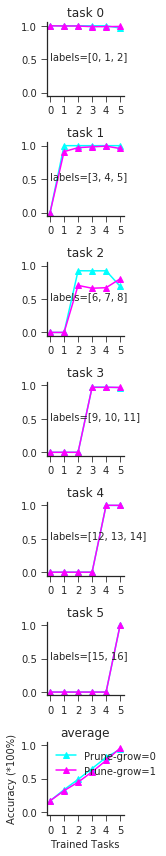

In [26]:
import pdb
figure(figsize=(2, 12))
axs = [subplot(n_tasks+1,1,1)]#, None, None]
for i in range(1, n_tasks + 1):
    axs.append(subplot(n_tasks+1,1, i+1, sharex=axs[0], sharey=axs[0]))
    
keys = list(data['mean'].keys())
sorted_keys = np.sort(keys)

for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
        colorVal = scalarMap.to_rgba(np.log(cval))
        # axs[j].plot(evals[:, j], c=colorVal)
        axs[j].errorbar(range(n_tasks), mean_vals[:, j], yerr=std_vals[:, j]/np.sqrt(n_stats), c=colorVal, marker='^')
    label = "Prune-grow=%g"%cval
    average = mean_vals.mean(1)  #Taking the average of cross validation accuracies accross all tasks after learning each task
    axs[-1].plot(average, c=colorVal, label=label,marker='^')
    axs[-1].set_xticks(np.arange(0, n_tasks, step=1))
    axs[-1].set_xlabel('Trained Tasks')
    axs[-1].set_ylabel('Accuracy (*100%)')

plt_tasklabel = task_labels[:]
plt_tasklabel.append('')
for i, ax in enumerate(axs):
    ax.legend(loc='upper left')
    ax.set_title((['task %d'%j for j in range(n_tasks)] + ['average'])[i])
    ax.text(0,0.5,('labels='+str(plt_tasklabel[i]))) if (i < len(task_labels)) else  ax.text(0,0.5,(plt_tasklabel[i]))

print(cleanup_nums)
gcf().tight_layout()
sns.despine()
plt.savefig('Prune-Dropout-AWID.pdf',bbox_inches='tight')

In [52]:
for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
       print(mean_vals[:, j],std_vals[:, j]/np.sqrt(n_stats))

[0.87980767 0.87905361 0.87933001 0.87927206 0.87927206 0.97585814] [0. 0. 0. 0. 0. 0.]
[0.         0.90958575 0.90958575 0.90958575 0.90958575 0.90958575] [0. 0. 0. 0. 0. 0.]
[0.         0.         0.62176752 0.62063076 0.62086394 0.62966422] [0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.86421434 0.86401984 0.8664064 ] [0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.87962762 0.87694645] [0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.] [0. 0. 0. 0. 0. 0.]
[0.99889185 0.99625203 0.99592468 0.98616786 0.98649458 0.98981584] [0. 0. 0. 0. 0. 0.]
[0.         0.91093621 0.96934548 0.98218724 0.991715   0.95733223] [0. 0. 0. 0. 0. 0.]
[0.         0.         0.7026641  0.66039991 0.66835723 0.80060044] [0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.97104671 0.97124121 0.97021312] [0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.99970209 0.99970209] [0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.] [0. 0. 0. 0. 0. 0.]


In [53]:
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


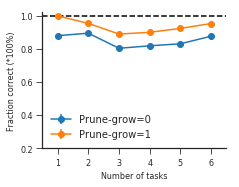

In [54]:
#Fractional Correctness = Average of cross validation accuracies of learned tasks only after training each task 
fig = plt.figure(figsize=(3.3,2.5))
ax = plt.subplot(111)

for cval in sorted_keys:
    mean_stuff = []
    std_stuff = []
    for i in range(len(data['mean'][cval])):
        mean_stuff.append(data['mean'][cval][i][:i+1].mean())
        std_stuff.append(np.sqrt((data['std'][cval][i][:i+1]**2).sum())/(n_stats*np.sqrt(n_stats)))
    # plot(range(1,n_tasks+1), mean_stuff, 'o-', label="c=%g"%cval)
    errorbar(range(1,n_tasks+1), mean_stuff, yerr=std_stuff, fmt='o-', label="Prune-grow=%g"%cval)
        
axhline(data['mean'][cval][0][0], linestyle='--', color='k')
xlabel('Number of tasks')
ylabel('Fraction correct (*100%)')
legend(loc='best')
xlim(0.5, n_tasks+0.5)
ylim(0.2, 1.02)
# grid('on')
# sns.despine()
simple_axis(ax)
plt.savefig('Prune-Dropout-AWID-fractioncorrectness.pdf',bbox_inches='tight')